## <font color='darkblue'>Preface</font>
([article source](https://www.kaggle.com/startupsci/titanic-data-science-solutions)) <font size='3ptx'>**This notebook is a companion to the book [Data Science Solutions](https://www.amazon.com/Data-Science-Solutions-Startup-Workflow/dp/1520545312).**</font>

The notebook walks us through a typical workflow for solving data science competitions at sites like Kaggle.

There are several excellent notebooks to study data science competition entries. However many will skip some of the explanation on how the solution is developed as these notebooks are developed by experts for experts. **The objective of this notebook is to follow a step-by-step workflow, explaining each step and rationale for every decision we take during solution development.**

### <font color='darkgreen'>Workflow stages</font>
The competition solution workflow goes through seven stages described in the Data Science Solutions book:
1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

The workflow indicates general sequence of how each stage may follow the other. However there are use cases with exceptions:
* We may combine mulitple workflow stages. We may analyze by visualizing data.
* Perform a stage earlier than indicated. We may analyze data before and after wrangling.
* Perform a stage multiple times in our workflow. Visualize stage may be used multiple times.
* Drop a stage altogether. We may not need supply stage to productize or service enable our dataset for a competition.

### <font color='darkgreen'>Question and problem definition</font>
Competition sites like Kaggle define the problem to solve or questions to ask while providing the datasets for training your data science model and testing the model results against a test dataset. The question or problem definition for Titanic Survival competition is [described here at Kaggle](https://www.kaggle.com/c/titanic):
> Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, **can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not**.

We may also want to develop some early understanding about the domain of our problem. This is described on the [Kaggle competition description page here](https://www.kaggle.com/c/titanic). Here are the highlights to note:
* On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
* One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
* Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

### <font color='darkgreen'>Workflow goals</font>
The data science solutions workflow solves for seven major goals.

#### Classifying
We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

#### Correlating
One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. **Correlating certain features may help in creating, completing, or correcting features.**

#### Converting
For modeling stage, one needs to prepare the data. **Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values**. So for instance converting text categorical values to numeric values.

#### Completing
Data preparation may also require us to **estimate any missing values within a feature. Model algorithms may work best when there are no missing values.**

#### Correcting 
We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. **One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.**

#### Creating
Can we **create new features based on an existing feature or a set of features**, such that the new feature follows the correlation, conversion, completeness goals.

#### Charting
How to **select the right visualization plots and charts depending on nature of the data and the solution goals**.

### <font color='darkgreen'>Agenda</font>
* <font size='3ptx'>[**Acquire data**](#acquire_data)</font>
* <font size='3ptx'>[**Analyze by describing data**](#sect2)</font>
* <font size='3ptx'>[**Analyze by pivoting features**](#sect3)</font>
* <font size='3ptx'>[**Analyze by visualizing data**](#sect4)</font>
* <font size='3ptx'>[**Wrangle data**](#wrangle_data)</font>
* <font size='3ptx'>[**Model, predict and solve**](#model)</font>

<a id='acquire_data'></a>
## <font color='darkblue'>Acquire data</font>
The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas [**DataFrames**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). We also combine these datasets to run certain operations on both datasets together.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df = pd.read_csv('../../datas/kaggle_titanic/train.csv')
test_df = pd.read_csv('../../datas/kaggle_titanic/test.csv')
combine = [train_df, test_df]

<a id='sect2'></a>
## <font color='darkblue'>Analyze by describing data</font>
Pandas also helps describe the datasets answering following questions early in our project ([Data column description](https://www.kaggle.com/c/titanic/data)).
![images/1.png](images/1.png)
<br/>

### <font color='darkgreen'>Which features are available in the dataset?</font>
Noting the feature names for directly manipulating or analyzing these. These feature names are described on the [Kaggle data page here](https://www.kaggle.com/c/titanic/data).

In [3]:
# train_df.columns.values
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### <font color='darkgreen'>Which features are categorical?</font>
These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.
* Categorical: `Survived`, `Sex`, and `Embarked`. Ordinal: `Pclass`.

### <font color='darkgreen'>Which features are numerical?</font>
Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.
* Continous: `Age`, `Fare`. Discrete: `SibSp`, `Parch`.

### <font color='darkgreen'>Which features are mixed data types?</font>
Numerical, alphanumeric data within same feature. These are candidates for correcting goal.
* `Ticket` is a mix of numeric and alphanumeric data types. `Cabin` is alphanumeric.

### <font color='darkgreen'>Which features may contain errors or typos?</font>
This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.
* Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

In [4]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### <font color='darkgreen'>Which features contain blank, null or empty values?</font>
These will require correcting.
* Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
* Cabin > Age are incomplete in case of test dataset.

### <font color='darkgreen'>What are the data types for various features?</font>
Helping us during converting goal.
* Seven features are integer or floats. Six in case of test dataset.
* Five features are strings (object).

In [5]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

### <font color='darkgreen'>What is the distribution of numerical feature values across the samples?</font>
This helps us determine, among other early insights, **how representative is the training dataset of the actual problem domain**.
* Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
* Survived is a categorical feature with 0 or 1 values.
* Around 38% samples survived representative of the actual survival rate at 32%.
* Most passengers (> 75%) did not travel with parents or children.
* Nearly 30% of the passengers had siblings and/or spouse aboard.
* Fares varied significantly with few passengers (<1%) paying as high as $512.
* Few elderly passengers (<1%) within age range 65-80.

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### <font color='darkgreen'>What is the distribution of categorical features?</font>
* Names are unique across the dataset (count=unique=891)
* Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
* Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
* Embarked takes three possible values. S port used by most passengers (top=S)
* Ticket feature has high ratio (22%) of duplicate values (unique=681).

In [7]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Staneff, Mr. Ivan",male,347082,G6,S
freq,1,577,7,4,644


### <font color='darkgreen'>Assumtions based on data analysis</font>
We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

#### Correlating
We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

#### Completing.
* We may want to complete Age feature as it is definitely correlated to survival.
* We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

#### Correcting
1. Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
2. Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
3. PassengerId may be dropped from training dataset as it does not contribute to survival.
4. Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

#### Creating
1. We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
2. We may want to engineer the Name feature to extract Title as a new feature.
3. We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
4. We may also want to create a Fare range feature if it helps our analysis.

#### Classifying
We may also add to our assumptions based on the problem description noted earlier.
1. Women (Sex=female) were more likely to have survived.
2. Children (Age<?) were more likely to have survived.
3. The upper-class passengers (Pclass=1) were more likely to have survived.

<a id='sect3'></a>
## <font color='darkblue'>Analyze by pivoting features</font>
To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (`Sex`), ordinal (`Pclass`) or discrete (`SibSp`, `Parch`) type.
* **`Pclass`**: We observe significant correlation (>0.5) among `Pclass=1` and `Survived` (<font color='brown'>classifying #3</font>). We decide to include this feature in our model.
* **`Sex`**: We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (<font color='brown'>classifying #1</font>).
* **`SibSp`** and **`Parch`**: These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (<font color='brown'>creating #1</font>).

In [8]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<a id='sect4'></a>
## <font color='darkblue'>Analyze by visualizing data</font>
Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

### <font color='darkgreen'>Correlating numerical features</font>
Let us start by understanding correlations between numerical features and our solution goal (`Survived`).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (<font color='brown'>Did infants have better survival rate?</font>)

Note that x-axis in historgram visualizations represents the count of samples or passengers.

c:\users\johnlee\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\johnlee\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


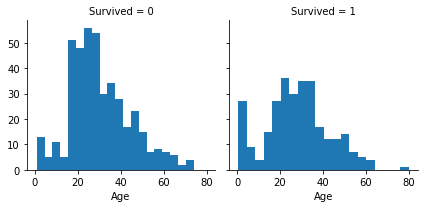

In [12]:
# plt.rcParams['figure.figsize'] = [12, 8]
# sns.set(rc={'figure.figsize':(12, 8)})
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

#### Observations
* Infants (Age <=4) had high survival rate.
* Oldest passengers (Age = 80) survived.
* Large number of 15-25 year olds did not survive.
* Most passengers are in 15-35 age range.

#### Decisions
This simple analysis confirms our assumptions as decisions for subsequent workflow stages.
* We should consider Age (our assumption classifying #2) in our model training.
* Complete the Age feature for null values (completing #1).
* We should band age groups (creating #3).

### <font color='darkgreen'>Correlating numerical and ordinal features</font>
We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

c:\users\johnlee\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\johnlee\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\johnlee\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


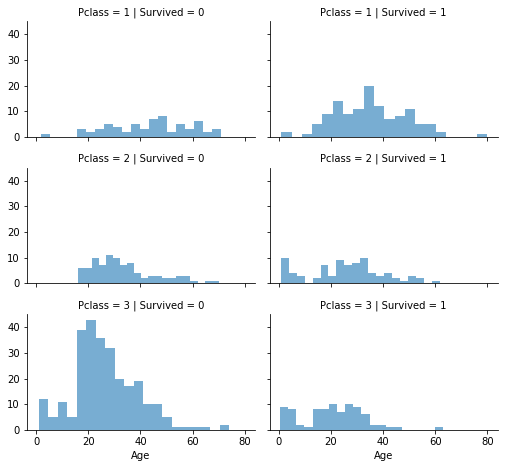

In [13]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.6, bins=20)
grid.add_legend();

#### Observations.
* `Pclass=3` had most passengers, however most did not survive. Confirms our classifying assumption #2.
* Infant passengers in `Pclass=2` and `Pclass=3` mostly survived. Further qualifies our classifying assumption #2.
* Most passengers in `Pclass=1` survived. Confirms our classifying assumption #3.
* `Pclass` varies in terms of Age distribution of passengers.

#### Decisions.
* Consider `Pclass` for model training.

### <font color='darkgreen'>Correlating categorical features</font>
Now we can correlate categorical features with our solution goal.

c:\users\johnlee\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\johnlee\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\johnlee\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


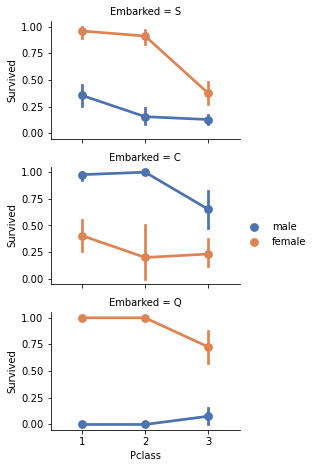

In [14]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

#### Observations.
* Female passengers had much better survival rate than males. Confirms classifying (#1).
* Exception in `Embarked=C` where males had higher survival rate. This could be a correlation between `Pclass` and `Embarked` and in turn `Pclass` and `Survived`, not necessarily direct correlation between `Embarked` and `Survived`.
* Males had better survival rate in `Pclass=3` when compared with `Pclass=2` for C and Q ports. Completing (#2).
* Ports of embarkation have varying survival rates for `Pclass=3` and among male passengers. Correlating (#1).

#### Decisions.
* Add `Sex` feature to model training.
* Complete and add `Embarked` feature to model training.

### <font color='darkgreen'>Correlating categorical and numerical features</font>
We may also want to correlate categorical features (<font color='brown'>with non-numeric values</font>) and numeric features. We can consider correlating `Embarked` (<font color='brown'>Categorical non-numeric</font>), `Sex` (<font color='brown'>Categorical non-numeric</font>), `Fare` (<font color='brown'>Numeric continuous</font>), with `Survived` (<font color='brown'>Categorical numeric</font>).

c:\users\johnlee\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\johnlee\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


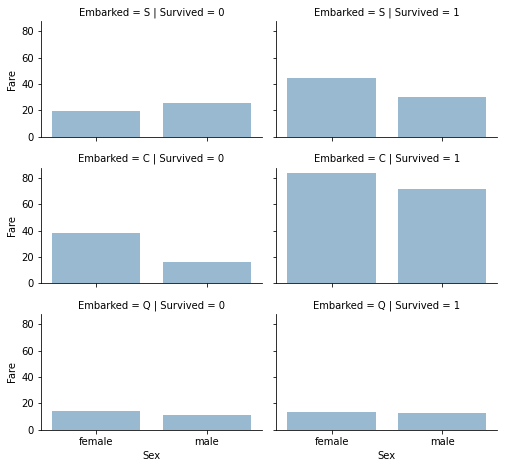

In [15]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

#### Observations.
* Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
* Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

#### Decisions.
* Consider banding Fare feature.

<a id='wrangle_data'></a>
## <font color='darkblue'>Wrangle data</font>
We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.
* [**Correcting by dropping features**](#data_s1)
* [**Creating new feature extracting from existing**](#data_s2)
* [**Converting a categorical feature**](#data_s3)
* [**Completing a numerical continuous feature**](#data_s4)
* [**Create new feature combining existing features**](#data_s5)
* [**Completing a categorical feature**](#data_s6)
* [**Converting categorical feature to numeric**](#data_s7)
* [**Quick completing and converting a numeric feature**](#data_s8)

<a id='data_s1'></a>
### <font color='darkgreen'>Correcting by dropping features</font>
This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis. Based on our assumptions and decisions we want to drop the `Cabin` (correcting #2) and `Ticket` (correcting #1) features.

Note that where applicable we **perform operations on both training and testing datasets together to stay consistent**.

In [16]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print(f"After {train_df.shape} {test_df.shape} {combine[0].shape} {combine[1].shape}")

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


<a id='data_s2'></a>
### <font color='darkgreen'>Creating new feature extracting from existing</font>
We want to analyze if `Name` feature can be engineered to extract titles and test correlation between titles and survival, before dropping `Name` and `PassengerId` features.

In the following code we extract `Title` feature using regular expressions. The [**RegEx**](https://docs.python.org/3/library/re.html) pattern (\w+\.) matches the first word which ends with a dot character within Name feature. The `expand=False` flag returns a [**Series**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html).

In [17]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We can replace many titles with a more common name or classify them as `Rare`.

In [18]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
        
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


We can convert the categorical titles to ordinal:

In [19]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Now we can safely drop the `Name` feature from training and testing datasets. We also do not need the `PassengerId` feature in the training dataset.

c:\users\johnlee\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\johnlee\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\johnlee\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


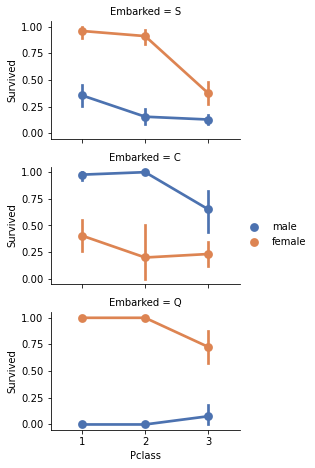

In [20]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

#### Observations.
When we plot Title, Age, and Survived, we note the following observations.
* Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.
* `Survival` among `Title` `Age` bands varies slightly.
* Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).

#### Decision.
* We decide to retain the new `Title` feature for model training.

<a id='data_s3'></a>
### <font color='darkgreen'>Converting a categorical feature</font>
Now we can **convert features which contain strings to numerical values. This is required by most model algorithms.** Doing so will also help us in achieving the feature completing goal.

Let us start by converting `Sex` feature to a new feature called `Gender` where female=1 and male=0.

In [21]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1


<a id='data_s4'></a>
### <font color='darkgreen'>Completing a numerical continuous feature</font>
Now we should start **estimating and completing features with missing or null values**. We will first do this for the `Age` feature.

We can consider three methods to complete a numerical continuous feature.
1. A simple way is to generate random numbers between mean and [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation).
2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among `Age`, `Gender`, and `Pclass`. Guess `Age` values using [median](https://en.wikipedia.org/wiki/Median) values for `Age` across sets of `Pclass` and `Gender` feature combinations. So, median Age for `Pclass=1` and `Gender=0`, `Pclass=1` and `Gender=1`, and so on...
3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of `Pclass` and `Gender` combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

c:\users\johnlee\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\johnlee\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\johnlee\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


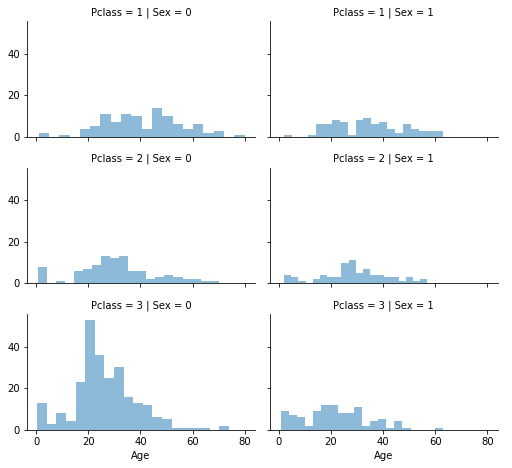

In [22]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed `Age` values based on `Pclass` x `Gender` combinations.

In [23]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over `Sex` (<font color='brown'>0 or 1</font>) and `Pclass` (<font color='brown'>1, 2, 3</font>) to calculate guessed values of `Age` for the six combinations.

In [24]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,8.0500,S,1


In [25]:
train_df['Age'].describe()

count    891.000000
mean      29.072952
std       13.326339
min        0.000000
25%       21.000000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

Let us create `Age` bands and determine correlations with `Survived`.

In [26]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Let us replace Age with ordinals based on these bands.

In [27]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


We can not remove the `AgeBand` feature.

In [28]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,8.0500,S,1


<a id='data_s5'></a>
### <font color='darkgreen'>Create new feature combining existing features</font>
We can create a new feature for `FamilySize` which combines `Parch` (<font color='brown'># of parents / children aboard the Titanic</font>) and `SibSp` (<font color='brown'># of siblings / spouses aboard the Titanic</font>). This will enable us to drop `Parch` and `SibSp` from our datasets.

In [29]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called `IsAlone`.

In [30]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop `Parch`, `SibSp`, and `FamilySize` features in favor of `IsAlone`:

In [31]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,71.2833,C,3,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,7.9250,S,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,53.1000,S,3,0
4,5,0,3,"Allen, Mr. William Henry",0,2,8.0500,S,1,1


We can also create an artificial feature combining `Pclass` and `Age`:

In [32]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


<a id='data_s6'></a>
### <font color='darkgreen'>Completing a categorical feature</font>
`Embarked` feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply **fill these with the most common occurance**.

In [33]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [34]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


<a id='data_s7'></a>
### <font color='darkgreen'>Converting categorical feature to numeric</font> ([back](#wrangle_data))
We can now convert the `EmbarkedFill` feature by creating a new numeric `Port` feature.

In [35]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0,3,"Braund, Mr. Owen Harris",0,1,7.2500,0,1,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,71.2833,1,3,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,7.9250,0,2,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,53.1000,0,3,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2,8.0500,0,1,1,6


<a id='data_s8'></a>
### <font color='darkgreen'>Quick completing and converting a numeric feature</font> ([back](#wrangle_data))
We can now complete the `Fare` feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.

Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for model algorithm to operate on non-null values.

We may also want round off the fare to two decimals as it represents currency.

In [36]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,"Kelly, Mr. James",0,2,7.8292,2,1,1,6
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,7.0000,0,3,0,6
2,894,2,"Myles, Mr. Thomas Francis",0,3,9.6875,2,1,1,6
3,895,3,"Wirz, Mr. Albert",0,1,8.6625,0,1,1,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,12.2875,0,3,0,3


We can not create `FareBand`.

In [37]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convert the `Fare` feature to ordinal values based on the `FareBand`:

In [38]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,0,1,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,3,1,3,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,1,0,2,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,3,0,3,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2,1,0,1,1,6
5,6,0,3,"Moran, Mr. James",0,1,1,2,1,1,3
6,7,0,1,"McCarthy, Mr. Timothy J",0,3,3,0,1,1,3
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0,2,0,4,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1,1,0,3,0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0,2,1,3,0,0


And the test dataset.

In [39]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,"Kelly, Mr. James",0,2,0,2,1,1,6
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,0,0,3,0,6
2,894,2,"Myles, Mr. Thomas Francis",0,3,1,2,1,1,6
3,895,3,"Wirz, Mr. Albert",0,1,1,0,1,1,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,0,3,0,3
5,897,3,"Svensson, Mr. Johan Cervin",0,0,1,0,1,1,0
6,898,3,"Connolly, Miss. Kate",1,1,0,2,2,1,3
7,899,2,"Caldwell, Mr. Albert Francis",0,1,2,0,1,0,2
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,1,0,1,3,1,3
9,901,3,"Davies, Mr. John Samuel",0,1,2,0,1,0,3


<a id='model'></a>
## <font color='darkblue'>Model, predict and solve</font>
Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (<font color='brown'>Survived or not</font>) with other variables or features (<font color='brown'>`Gender`, `Age`, `Port`...</font>). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:
* Logistic Regression
* KNN or k-Nearest Neighbors
* Support Vector Machines
* Naive Bayes classifier
* Decision Tree
* Random Forrest
* Perceptron
* Artificial neural network
* RVM or Relevance Vector Machine

In [48]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train = X_train.drop("PassengerId", axis=1)
X_train = X_train.drop("Name", axis=1)
X_test = X_test.drop("Name", axis=1)
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [49]:
print(f"X_train.columns: {sorted(X_train.columns)}")
print(f"X_test.columns: {sorted(X_test.columns)}")

X_train.columns: ['Age', 'Age*Class', 'Embarked', 'Fare', 'IsAlone', 'Pclass', 'Sex', 'Title']
X_test.columns: ['Age', 'Age*Class', 'Embarked', 'Fare', 'IsAlone', 'Pclass', 'Sex', 'Title']


In [50]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,1,0,0,1,0,3
1,1,1,2,3,1,3,0,2
2,3,1,1,1,0,2,1,3
3,1,1,2,3,0,3,0,2
4,3,0,2,1,0,1,1,6


In [51]:
X_test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,2,0,2,1,1,6
1,3,1,2,0,0,3,0,6
2,2,0,3,1,2,1,1,6
3,3,0,1,1,0,1,1,3
4,3,1,1,1,0,3,0,3


### <font color='darkgreen'>Logistic Regression</font>
[**Logistic Regression**](https://en.wikipedia.org/wiki/Logistic_regression) is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

Note the confidence score generated by the model based on our training dataset:

In [52]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.37

We can **use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals**. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (<font color='brown'>and thus increase the probability</font>), and negative coefficients decrease the log-odds of the response (<font color='brown'>and thus decrease the probability</font>):
* `Sex` is highest positivie coefficient, implying as the `Sex` value increases (<font color='brown'>male: 0 to female: 1</font>), the probability of `Survived=1` increases the most.
* Inversely as `Pclass` increases, probability of `Survived=1` decreases the most.
* This way `Age*Class` is a good artificial feature to model as it has second highest negative correlation with `Survived`.
* So is `Title` as second highest positive correlation.

In [63]:
list(X_train.columns)

['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'IsAlone', 'Age*Class']

In [62]:
logreg.coef_[0].tolist()

[-1.200308542447854,
 2.201056992470615,
 -0.4696375203145975,
 -0.07166542579847573,
 0.27662780991612335,
 0.4060272437127461,
 0.18598592416753348,
 -0.0502598867726547]

In [66]:
coeff_df = pd.DataFrame([
    [col, cof] for col, cof in zip(list(X_train.columns), logreg.coef_[0].tolist())], 
    columns=['Feature', 'Correlation']
)
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201057
5,Title,0.406027
4,Embarked,0.276628
6,IsAlone,0.185986
7,Age*Class,-0.050260
3,Fare,-0.071665
2,Age,-0.469638
0,Pclass,-1.200309


### <font color='darkgreen'>SVM</font>
Next we model using [**Support Vector Machines**](https://en.wikipedia.org/wiki/Support_vector_machine) which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.

Note that the model generates a confidence score which is higher than Logistics Regression model.

In [72]:
# Support Vector Machines
svc = SVC(kernel='poly')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.5

### <font color='darkgreen'>KNN</font>
In pattern recognition, the [**k-Nearest Neighbors algorithm**](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) (<font color='brown'>or k-NN for short</font>) is a non-parametric method used for classification and regression. **A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its `k` nearest neighbors** (<font color='brown'>`k` is a positive integer, typically small</font>). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

KNN confidence score is better than Logistics Regression but worse than SVM.

In [68]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.06

### <font color='darkgreen'>GNB</font>
In machine learning, [**Naive Bayes classifiers**](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (<font color='brown'>features</font>) in a learning problem.

The model generated confidence score is the lowest among the models evaluated so far.

In [73]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.88

### <font color='darkgreen'>Stochastic Gradient Descent</font>

In [74]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

38.38

### <font color='darkgreen'>Decision Tree</font>
[**This model**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) uses a decision tree as a predictive model which maps features (<font color='brown'>tree branches</font>) to conclusions about the target value (<font color='brown'>tree leaves</font>). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (<font color='brown'>typically real numbers</font>) are called regression trees. 

In [75]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.64

### <font color='darkgreen'>Random Forest</font>
The next model [**Random Forests**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (`n_estimators=100`) at training time and outputting the class that is the mode of the classes (<font color='brown'>classification</font>) or mean prediction (<font color='brown'>regression</font>) of the individual trees.

In [76]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.64

### <font color='darkgreen'>Model evaluation</font>
We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.

In [77]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent',  
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,  
              acc_sgd, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.64
6,Decision Tree,86.64
1,KNN,84.06
0,Support Vector Machines,83.50
2,Logistic Regression,81.37
4,Naive Bayes,76.88
5,Stochastic Gradient Decent,38.38



## <font color='darkblue'>Supplement</font>
* [Categorical Variables and ColumnTransformer in scikit-learn](https://johaupt.github.io/scikit-learn/tutorial/python/data%20processing/ml%20pipeline/sklearn_categorical_variables_pipeline.html)
* [Scikit-learn doc - Using KBinsDiscretizer to discretize continuous features](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization.html)